# Statistics Introduction Applied to Data Science
## Bonus : Two - Time Series

### Decomposing Time Series

* Trend
* Seasonality
* Noise

### Additive Model

An additive model is linear.  y(t) = Level + Trend + Seasonality + Noise

It is useful when the variations around the trend does not vary with the level of the time series. Components are added together.

### Multiplicative Model

A multiplicative model is non-linear:   y(t) = Level * Trend * Seasonality * Noise 

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.
It is useful when the trend is proportional to the level of the time series.  Components are multiplied together.

### Basic Statistics Information

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('YesBank_StockPrices.csv', sep=',')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [4]:
# You can create a sequences of dates and times
idx = pd.date_range(start='2005-07', end='2020-12', freq='M')
idx

DatetimeIndex(['2005-07-31', '2005-08-31', '2005-09-30', '2005-10-31',
               '2005-11-30', '2005-12-31', '2006-01-31', '2006-02-28',
               '2006-03-31', '2006-04-30',
               ...
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31', '2020-08-31', '2020-09-30',
               '2020-10-31', '2020-11-30'],
              dtype='datetime64[ns]', length=185, freq='M')

In [5]:
# Add DatetimeIndex to dataframe
df.set_index(idx, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2005-07-31 to 2020-11-30
Freq: M
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 8.7+ KB


In [6]:
df.head()

,Date,Open,High,Low,Close
2005-07-31,Jul-05,13.00,14.00,11.25,12.46
2005-08-31,Aug-05,12.58,14.88,12.55,13.42
2005-09-30,Sep-05,13.48,14.87,12.27,13.30
2005-10-31,Oct-05,13.20,14.47,12.40,12.99
2005-11-30,Nov-05,13.35,13.88,12.88,13.41


In [7]:
# Statistics summarization with describe function
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


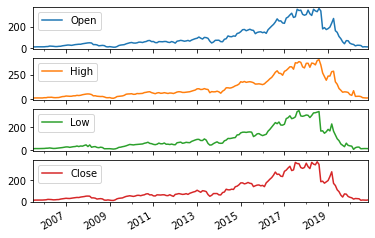

In [8]:
#Line chart all measures
df.plot(subplots=True)
plt.show()

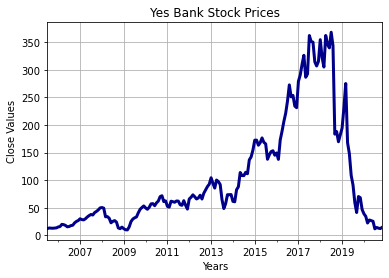

In [9]:
#Visualize with line chart

plt.style.use('seaborn-deep')
ax = df['Close'].plot(color='darkblue', grid=True, linewidth=3)
ax.set_xlabel('Years')
ax.set_ylabel('Close Values')
ax.set_title('Yes Bank Stock Prices')
plt.show()

Histogram - Close Value


<AxesSubplot:ylabel='Frequency'>

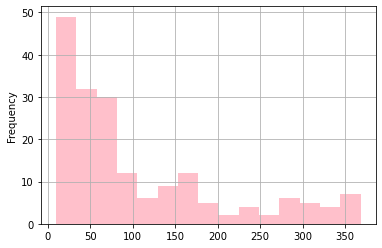

In [10]:
print ('Histogram - Close Value')
df['Close'].plot(kind='hist', bins=15, color='pink', grid=True)

Density - Close Value


<AxesSubplot:ylabel='Density'>

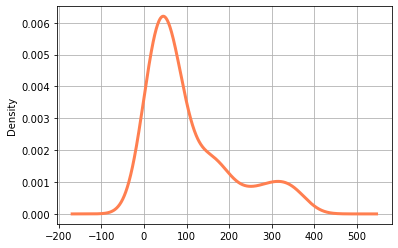

In [11]:
print('Density - Close Value')
df['Close'].plot(kind='density', color="coral", grid=True, linewidth=3, fontsize=10)

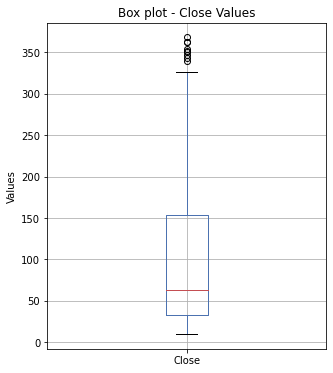

In [12]:
# Distribution of close value with Box-Plot
ax = df['Close'].plot.box(
    showfliers=True,
    grid=True,
    figsize=(5, 6)
)

ax.set_ylabel('Values')
ax.set_title('Box plot - Close Values')

plt.suptitle("")
plt.show()


# Modelling Time Series

### Decomposing Time Series

#### Application of Additive Model

In [13]:
# Example: Yes Bank Stock Prices. Close values time series shows seasonality.
from statsmodels.tsa.seasonal import seasonal_decompose

ts1 = df['Close']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model='additive', period=12)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

2005-07-31   NaN
2005-08-31   NaN
2005-09-30   NaN
2005-10-31   NaN
2005-11-30   NaN
              ..
2020-07-31   NaN
2020-08-31   NaN
2020-09-30   NaN
2020-10-31   NaN
2020-11-30   NaN
Freq: M, Name: trend, Length: 185, dtype: float64
2005-07-31    8.016819
2005-08-31    2.008784
2005-09-30   -9.435264
2005-10-31   -4.758210
2005-11-30   -8.118210
                ...   
2020-07-31    8.016819
2020-08-31    2.008784
2020-09-30   -9.435264
2020-10-31   -4.758210
2020-11-30   -8.118210
Freq: M, Name: seasonal, Length: 185, dtype: float64
2005-07-31   NaN
2005-08-31   NaN
2005-09-30   NaN
2005-10-31   NaN
2005-11-30   NaN
              ..
2020-07-31   NaN
2020-08-31   NaN
2020-09-30   NaN
2020-10-31   NaN
2020-11-30   NaN
Freq: M, Name: resid, Length: 185, dtype: float64
2005-07-31    12.46
2005-08-31    13.42
2005-09-30    13.30
2005-10-31    12.99
2005-11-30    13.41
              ...  
2020-07-31    11.95
2020-08-31    14.37
2020-09-30    13.15
2020-10-31    12.42
2020-11-30    14.67


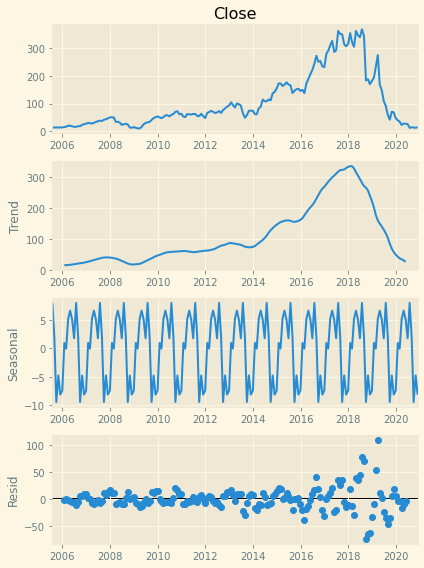

In [14]:
# Example: Yes Bank Stock Prices. Close values time series shows seasonality.
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

rcParams['figure.figsize'] = 6, 8
plt.style.use('Solarize_Light2')

ts1 = df['Close']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model='additive',period=12)
result.plot()
plt.show()

### Application of Multiplicative Model

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts1 = df['Close']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model='multiplicative', period=12)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

2005-07-31   NaN
2005-08-31   NaN
2005-09-30   NaN
2005-10-31   NaN
2005-11-30   NaN
              ..
2020-07-31   NaN
2020-08-31   NaN
2020-09-30   NaN
2020-10-31   NaN
2020-11-30   NaN
Freq: M, Name: trend, Length: 185, dtype: float64
2005-07-31    1.013797
2005-08-31    0.964985
2005-09-30    0.943392
2005-10-31    1.004118
2005-11-30    0.987783
                ...   
2020-07-31    1.013797
2020-08-31    0.964985
2020-09-30    0.943392
2020-10-31    1.004118
2020-11-30    0.987783
Freq: M, Name: seasonal, Length: 185, dtype: float64
2005-07-31   NaN
2005-08-31   NaN
2005-09-30   NaN
2005-10-31   NaN
2005-11-30   NaN
              ..
2020-07-31   NaN
2020-08-31   NaN
2020-09-30   NaN
2020-10-31   NaN
2020-11-30   NaN
Freq: M, Name: resid, Length: 185, dtype: float64
2005-07-31    12.46
2005-08-31    13.42
2005-09-30    13.30
2005-10-31    12.99
2005-11-30    13.41
              ...  
2020-07-31    11.95
2020-08-31    14.37
2020-09-30    13.15
2020-10-31    12.42
2020-11-30    14.67


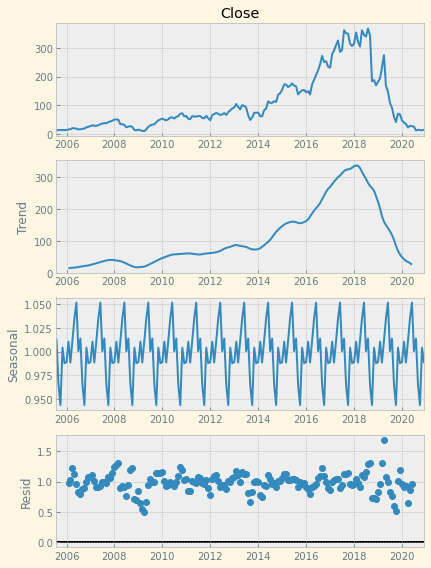

In [16]:
# Example:  Yes Bank Stock Prices, Close values, time series shows seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
#from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 6, 8
plt.style.use('bmh')

ts1 = df['Close']
# freq is the number of data points in a repeated cycle
result = seasonal_decompose(ts1, model='multiplicative', period=12)
result.plot()
plt.show()

In [17]:
# End.